In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt

def add_path(custom_path):
    if custom_path not in sys.path: sys.path.insert(0, custom_path)

this_dir = os.getcwd()
# [1] Path to modules to resolve import issue
lib_path = os.path.join(this_dir, 'planning_scenario', 'geometric')
add_path(lib_path)

In [2]:
from planning_scenario.geometric.narrow_world import narrow_world
from planning_scenario.geometric.random_world import random_world

## Narrow Passage

Tthis problem is prohibitly expensive with A* (i.e. practically insolvable) or even naive RRT without trick.

Change "bidirectional_rrt" to "astar" to give it a try if you want :-D

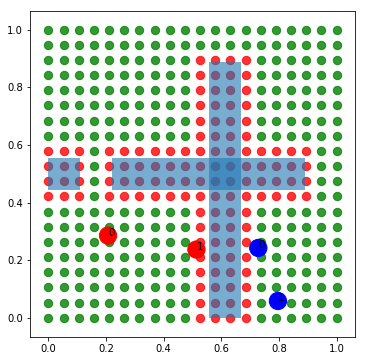

It took 3.3511 seconds for bidirectional_rrt to solve the plotted planning problem


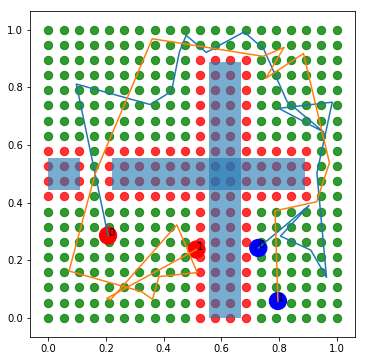

(array([0.20679199, 0.28541814, 0.5134975 , 0.23688924]), array([0.20679199, 0.28541814, 0.5134975 , 0.23688924, 0.72831326,
       0.24226542, 0.79629574, 0.05827759, 0.11111111, 0.44444444,
       0.22222222, 0.55555556, 0.88888889, 0.44444444, 1.        ,
       0.55555556, 0.55555556, 0.88888889, 0.66666667, 1.        ]))


In [3]:
solver = "bidirectional_rrt"
num_agent = 2
test_world = narrow_world(num_agent)
test_world.plot()
start_cp = time.time()
soln = test_world.solve(solver)
time_elapsed = round(time.time() - start_cp, 4)
print("It took {0} seconds for {1} to solve the plotted planning problem".format(time_elapsed, solver))
test_world.plot(soln = soln)
data = test_world.get_trainable_data()
print(data[0])

## Random World

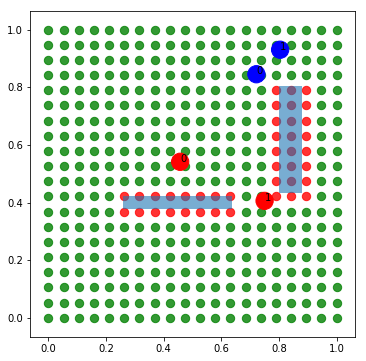

It took 3.8685 seconds for rrt to solve the plotted planning problem


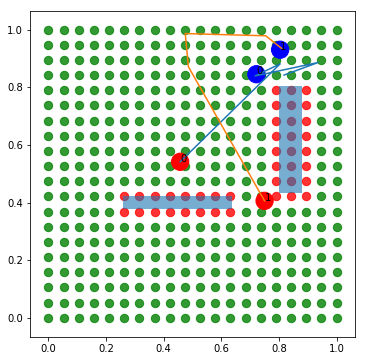

It took 0.0756 seconds for bidirectional_rrt to solve the plotted planning problem


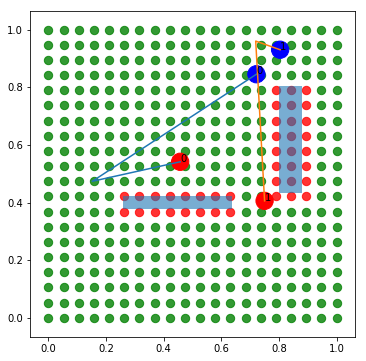

(array([0.45702221, 0.54142242, 0.74999397, 0.40579212]), array([0.45702221, 0.54142242, 0.74999397, 0.40579212, 0.72162354,
       0.84525152, 0.80403541, 0.93028088, 0.801     , 0.432     ,
       0.88024679, 0.80368089, 0.259     , 0.377     , 0.63841218,
       0.4233239 ]))


In [4]:
# When there are obstacles between start position and goals
# A* will be useless
solver = "rrt"
test_world = random_world(2, 10, "rectangle")
test_world.plot()
start_cp = time.time()
soln = test_world.solve(solver)
time_elapsed = round(time.time() - start_cp, 4)
print("It took {0} seconds for {1} to solve the plotted planning problem".format(time_elapsed, solver))
test_world.plot(soln = soln)
solver = "bidirectional_rrt"
start_cp = time.time()
soln = test_world.solve(solver)
time_elapsed = round(time.time() - start_cp, 4)
print("It took {0} seconds for {1} to solve the plotted planning problem".format(time_elapsed, solver))
test_world.plot(soln = soln)
data = test_world.get_trainable_data()
print(data[0])